# ASSIGNMENT 2

Question 1

In [1]:
#Importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

%matplotlib inline

In [2]:
#finding Path to directory
%pwd

'C:\\Users\\aishw'

In [3]:
#Assigning path to variable path
path = 'C:\\Users\\aishw\\OneDrive\\Desktop\\DSEM'

In [4]:
# Read data into notebook

train = pd.read_csv(f'{path}/Titanic_I.csv') 
test = pd.read_csv(f'{path}/Titanic_II.csv')
df = pd.concat([train, test], axis=0, sort=True)


In [5]:
#displaying dataframe
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [7]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

In [8]:
#Counting Survived
df['Survived'].value_counts()

0    804
1    505
Name: Survived, dtype: int64

In [9]:
# create new Title column
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

C:\Users\aishw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


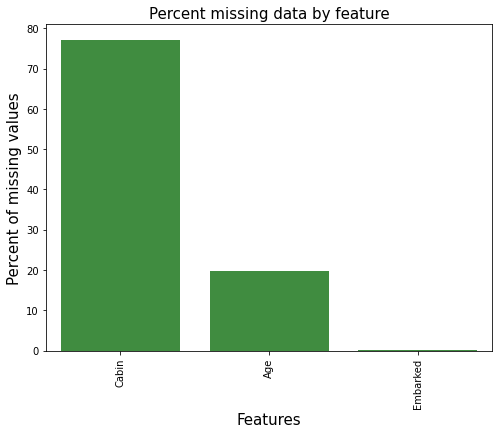

In [10]:
missingdata(train)

In [11]:
df.head(20)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736,Mrs


In [12]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [13]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

In [14]:
# confirm that we are left with just six values
df['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

In [15]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())

# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

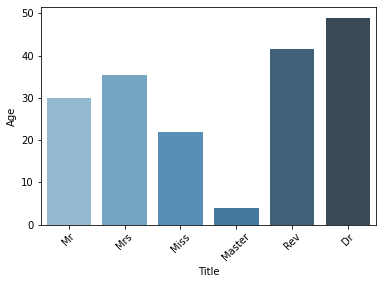

In [16]:
sns.barplot(x='Title', y='Age', data=df, estimator=np.median, ci=None, palette='Blues_d')
plt.xticks(rotation=45)
plt.show()

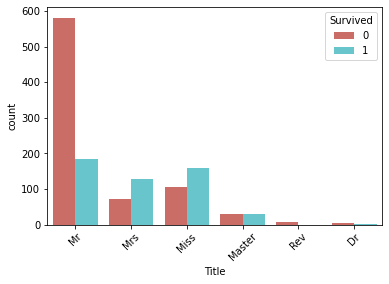

In [17]:
sns.countplot(x='Title', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

C:\Users\aishw\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\aishw\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


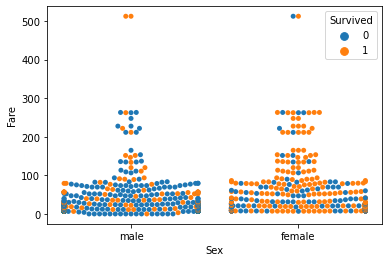

In [18]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df)
plt.show()

In [19]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# create a column of the average fares
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

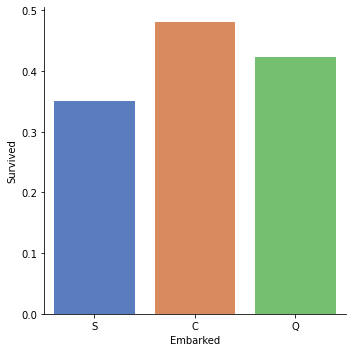

In [20]:
sns.catplot(x='Embarked', y='Survived', data=df,
            kind='bar', palette='muted', ci=None)
plt.show()

In [21]:
df['Embarked'].fillna(method='backfill', inplace=True)

In [22]:
# create Family_Size column (Parch +)
df['Family_Size'] = df['Parch'] + df['SibSp']

In [23]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [24]:
train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]

In [25]:
train.to_csv('train_clean.csv', index=False)
test.to_csv('test_clean.csv', index=False)

Question 2

In [ ]:
#1) Bagging is merging same type of prediction 
#2) It uses Low Bias and High Variance Type of Model and fully grown decision tree
#3) Models are built independently, It has parallel training model(One part of data is randomly taken and trained parallerly) 

#1) Boosting is a technique for combining various prediction types.
#2) It uses High Bias and Low Variance type of Model in the ML and has shallow decision tree
#3) Models are influenced by a built model's boosting performance, Output of previous model is given as input to next model

In [26]:
df1= df.drop(columns=["Name","Cabin","Ticket","Fare"])
df1=df1.dropna()

In [27]:
from sklearn import preprocessing

In [28]:
le=preprocessing.LabelEncoder()
for column_name in df1.columns:
    if df1['Sex'].dtype == object:
        df1['Sex'] = le.fit_transform(df1['Sex'])
    else:
        pass

In [29]:
df1 ['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split
X = df1[['Pclass','Sex','Age','SibSp','Parch']]
y = df1['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36)

# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=17)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                     metric_params=None, n_jobs=None, n_neighbors = 17,p=2,weights='uniform')

y_predictions = knn_classifier.predict(X_test)



In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test,y_predictions)*100
knn_acc = str(round(accuracy,2))+'%'
print ('Accuracy of model is equal '+ str(round(accuracy,2))+'%')

Accuracy of model is equal 66.03%


# Gradient Boosting

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [34]:
y_preds = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test,y_preds)*100
grad_acc = str(round(accuracy,2))+'%'
print ('Accuracy of model is equal '+ str(round(accuracy,2))+'%')

Accuracy of model is equal 67.94%


# Random Forest

In [36]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a gaussian classifier
clf=RandomForestClassifier(n_estimators = 100)
#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [37]:
from sklearn import metrics
#how often is the classifier correct
rand_acc = metrics.accuracy_score(y_test,y_pred)* 100
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)* 100)

Accuracy: 64.8854961832061


In [38]:
# models = pd.DataFrame({
#     'Model': [ 'KNN', 'Random Forest', 'Gradient Boosting Classifier'],
#     'Score': [knn_acc, rand_acc, grad_acc]})
# models.sort_values(by='Score', ascending=False)

Question 3

In [39]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a gaussian classifier
clf=RandomForestClassifier(n_estimators = 10)
#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
#how often is the classifier correct
Accuracy1 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy1:", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy1: 64.50381679389314


In [40]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a gaussian classifier
clf=RandomForestClassifier(n_estimators = 100)
#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
#how often is the classifier correct
Accuracy2 =metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy2:", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy2: 65.2671755725191


In [41]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a gaussian classifier
clf=RandomForestClassifier(n_estimators = 200)
#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
#how often is the classifier correct
Accuracy3 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy3:", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy3: 65.2671755725191


In [42]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a gaussian classifier
clf=RandomForestClassifier(n_estimators = 300)
#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
#how often is the classifier correct
Accuracy4 =metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy4:", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy4: 65.2671755725191


In [43]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
#Create a gaussian classifier
clf=RandomForestClassifier(n_estimators = 400)
#Train the model using training sets y_pred = clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
#how often is the classifier correct
Accuracy5 = metrics.accuracy_score(y_test,y_pred)*100
print("Accuracy5:", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy5: 66.03053435114504


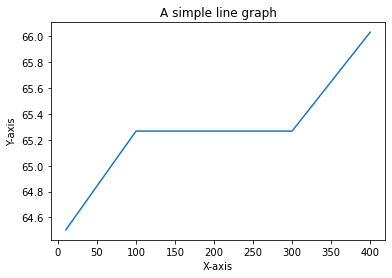

In [44]:
x1=[10,100,200,300,400]
y1=[Accuracy1,Accuracy2,Accuracy3,Accuracy4,Accuracy5]
plt.plot(x1,y1)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title("A simple line graph")
plt.show()

In [ ]:
#Conclusion
#larger n_estimators do not always result in a better model
#If there are more trees involved, we might claim that the result should be more generalized. 
#But as the number of trees rises, so does the time complexity.

Question 4

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Plotting
from pandas import Series,DataFrame
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,10) #Set the default figure size
plt.style.use('ggplot') #Set the plotting method

from sklearn.model_selection import train_test_split #Split the data into train and test
from sklearn.ensemble import RandomForestRegressor #Forest for prediction and regression
from sklearn.linear_model import LinearRegression #Regression for prediction
from sklearn.preprocessing import StandardScaler #Scale the data
from sklearn.metrics import mean_squared_error #Error testing

In [46]:
bnb = pd.read_csv("C:\\Users\\aishw\\OneDrive\\Desktop\\DSEM\\AB_US_2020.csv", low_memory=False)
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [47]:
airbnb_raw = pd.read_csv("C:\\Users\\aishw\\OneDrive\\Desktop\\DSEM\\AB_US_2020.csv", low_memory=False)
airbnb_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [48]:
#Make 0's 1 so the log function works
bnb["price"] = bnb["price"].apply(lambda x: 1 if x < 1 else x) 

In [49]:
#Print some attributes about the prices
print("Max Price: ", np.max(bnb["price"]))
print("Min Price: ", np.min(bnb["price"]))
print("Num Prices Below 20: ", len(bnb.loc[bnb["price"] < 20]))
print("Num Prices Above 1000: ", len(bnb.loc[bnb["price"] > 1000]))
print("Num Locations", len(bnb))

Max Price:  24999
Min Price:  1
Num Prices Below 20:  559
Num Prices Above 1000:  4578
Num Locations 226030


In [50]:
print(bnb.isnull().any()) #Check for null values

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group                True
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
city                              False
dtype: bool


In [51]:
print(bnb.loc[bnb["reviews_per_month"].isnull()]) #See where reviews_per_month is null

              id                                               name  \
187      6775949                Cozy Cottage short walk to Downtown   
286     12182918        MONTHLY - Grove Park - Charming Guest House   
416     15359380          5 Points Bungalow, Your Home in Asheville   
629     20255923      Sunrise Perch - High on a mountain & close-in   
720     21513021       2 Bedroom Condo blocks to Downtown Asheville   
...          ...                                                ...   
226025  45506143                          DC Hidden In Plain "Site"   
226026  45511428  DC 3 BR w/ screen porch 3 blck to metro w/ par...   
226027  45514685  Charming Penthouse Apt w/ Rooftop Terrace in L...   
226028  45516412                Adams Morgan/Nat'l Zoo 1 BR Apt #32   
226029  45517735    Beautiful large one-bedroom w/ washer and dryer   

          host_id         host_name neighbourhood_group  \
187      35473023            Sherri                 NaN   
286        183656            

In [52]:
print(bnb.loc[bnb["host_name"].isnull()]) #See where host_name is null

              id                                               name  \
3129     4356661                   1 BR 1 Bath DT Apt [W/D in unit]   
3866     8214182                Private room  in all female housing   
7619    27025549    Studio apt in prime central Austin free parking   
17727   16879934  HUGE LAKE VIEW MASTER BDRM  (sleeps 2) near we...   
17995   18406577                                         comfy home   
18913   22560010                                         Comfy Home   
76723    6900415                          Quiet, Cozy West LA House   
78167   10034835                     Large private bedroom in Palms   
83235   19410610                          Cozy Home Away From Home!   
83948   20450454                               Venice Artista House   
96175   38358017  Modern Beachfront Guest Suite Hidden Ocean Escape   
100462  42697243   Private Master Room with Private Bath in West LA   
105755  15820455                 1 BR Condo Downtown/Nissan Stadium   
122099

In [53]:
print(bnb.loc[bnb["name"].isnull()]) #See where name is null

              id name    host_id  host_name neighbourhood_group  \
23691   39717529  NaN  305261435      Patti                 NaN   
81872   17108083  NaN  114871749     Karina        Other Cities   
93004   33877948  NaN  141228320    Marquis        Other Cities   
119475   1615764  NaN    6676776      Peter           Manhattan   
120149   2232600  NaN   11395220       Anna           Manhattan   
121853   4209595  NaN   20700823      Jesse           Manhattan   
122016   4370230  NaN   22686810   Micha√´l           Manhattan   
122265   4581788  NaN   21600904      Lucie            Brooklyn   
122513   4756856  NaN    1832442   Carolina            Brooklyn   
122544   4774658  NaN   24625694       Josh           Manhattan   
124383   6782407  NaN   31147528   Huei-Yin            Brooklyn   
126967   9325951  NaN   33377685   Jonathan           Manhattan   
127629   9787590  NaN   50448556     Miguel           Manhattan   
127822   9885866  NaN   37306329   Juliette           Manhatta

In [54]:
bnb["name"] = bnb["name"].fillna("AIRBNB HOUSING") #Fill the null name values with "AIRBNB HOUSING"
print(bnb.loc[bnb["name"] == "AIRBNB HOUSING"]) #See where name is fixed to make sure this works

bnb["host_name"] = bnb["host_name"].fillna("AIRBNB HOST") #Fill the null host name values with "AIRBNB HOST"
print(bnb.loc[bnb["host_name"] == "AIRBNB HOST"]) #See where host_name is fixed to make sure this works

bnb["neighbourhood_group"] = bnb["neighbourhood_group"].fillna("Other") #Fill the null neighbourhood group values with "Other"

bnb["reviews_per_month"] = bnb["reviews_per_month"].fillna(0) #Fill the null reviews_per_month values with 0

bnb["last_review"] = bnb["last_review"].fillna("01/01/01") #Fill the null last_review values with 01/01/01
bnb["last_review"] = pd.to_datetime(bnb["last_review"]) #Convert the last review to datetime
print(bnb["last_review"]) #Print the last review



              id            name    host_id  host_name neighbourhood_group  \
23691   39717529  AIRBNB HOUSING  305261435      Patti                 NaN   
81872   17108083  AIRBNB HOUSING  114871749     Karina        Other Cities   
93004   33877948  AIRBNB HOUSING  141228320    Marquis        Other Cities   
119475   1615764  AIRBNB HOUSING    6676776      Peter           Manhattan   
120149   2232600  AIRBNB HOUSING   11395220       Anna           Manhattan   
121853   4209595  AIRBNB HOUSING   20700823      Jesse           Manhattan   
122016   4370230  AIRBNB HOUSING   22686810   Micha√´l           Manhattan   
122265   4581788  AIRBNB HOUSING   21600904      Lucie            Brooklyn   
122513   4756856  AIRBNB HOUSING    1832442   Carolina            Brooklyn   
122544   4774658  AIRBNB HOUSING   24625694       Josh           Manhattan   
124383   6782407  AIRBNB HOUSING   31147528   Huei-Yin            Brooklyn   
126967   9325951  AIRBNB HOUSING   33377685   Jonathan          

              id                                               name  \
3129     4356661                   1 BR 1 Bath DT Apt [W/D in unit]   
3866     8214182                Private room  in all female housing   
7619    27025549    Studio apt in prime central Austin free parking   
17727   16879934  HUGE LAKE VIEW MASTER BDRM  (sleeps 2) near we...   
17995   18406577                                         comfy home   
18913   22560010                                         Comfy Home   
76723    6900415                          Quiet, Cozy West LA House   
78167   10034835                     Large private bedroom in Palms   
83235   19410610                          Cozy Home Away From Home!   
83948   20450454                               Venice Artista House   
96175   38358017  Modern Beachfront Guest Suite Hidden Ocean Escape   
100462  42697243   Private Master Room with Private Bath in West LA   
105755  15820455                 1 BR Condo Downtown/Nissan Stadium   
122099

0        2020-02-16
1        2020-07-09
2        2019-11-30
3        2020-09-22
4        2015-10-19
            ...    
226025   2001-01-01
226026   2001-01-01
226027   2001-01-01
226028   2001-01-01
226029   2001-01-01
Name: last_review, Length: 226030, dtype: datetime64[ns]


In [55]:
print(bnb.isnull().any()) #Check for null values

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
city                              False
dtype: bool


In [56]:
#Change the column names to ones I prefer
bnb = bnb.rename(columns = {"host_id" : "hostId", "host_name" : "hostName", "neighbourhood_group" : "neighGroup",
                            "neighbourhood" : "neigh", "room_type" : "roomType", "minimum_nights" : "minNights",
                            "number_of_reviews" : "numReviews", "last_review" : "lastReview", "reviews_per_month" : "monthlyReviews",
                            "calculated_host_listings_count" : "numListings", "availability_365" : "available"})
bnb.head() #Take a peek at the dataset

,id,name,hostId,hostName,neighGroup,neigh,latitude,longitude,roomType,price,minNights,numReviews,lastReview,monthlyReviews,numListings,available,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,Other,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,Other,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,Other,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,Other,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,Other,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville


In [57]:
print(bnb["city"].unique()) #See all the unique "cities" in the data

['Asheville' 'Austin' 'Boston' 'Broward County' 'Cambridge' 'Chicago'
 'Clark County' 'Columbus' 'Denver' 'Hawaii' 'Jersey City' 'Los Angeles'
 'Nashville' 'New Orleans' 'New York City' 'Oakland' 'Pacific Grove'
 'Portland' 'Rhode Island' 'Salem' 'San Clara Country' 'San Diego'
 'San Francisco' 'San Mateo County' 'Santa Cruz County' 'Seattle'
 'Twin Cities MSA' 'Washington D.C.']


In [58]:
#A list of areas in the dataset that are part of the San Francisco major area
SF = ["Oakland", "Pacific Grove", "San Clara Country", "Santa Cruz County", "San Mateo County", "San Francisco"]

#Fix the cities into their major areas
#Input: the city/state/county named state (this column has so many different things)
#Output: the fixed label
def fixState(state):
    
    #Fix the labels whose major areas are not as clear
    if state == "Broward County":
        return "Miami"
    if state == "Twin Cities MSA":
        return "Minneapolis"
    if state == "Clark County":
        return "Las Vegas"
    
    #Lump labels together if thier major area is the same
    if state == "Boston" or state == "Cambridge":
        return "Boston"
    if state == "Portland" or state == "Salem":
        return "Portland"
    if state == "Jersey City":
        return "New York City"
    if state in SF:
        return "San Francisco"
    
    return state #Return the label if it does not need to change

bnb["city"] = bnb["city"].apply(fixState) #Fix the city column with its major areas

In [59]:
print(bnb["city"].unique())

['Asheville' 'Austin' 'Boston' 'Miami' 'Chicago' 'Las Vegas' 'Columbus'
 'Denver' 'Hawaii' 'New York City' 'Los Angeles' 'Nashville' 'New Orleans'
 'San Francisco' 'Portland' 'Rhode Island' 'San Diego' 'Seattle'
 'Minneapolis' 'Washington D.C.']


In [60]:
price = bnb["price"].copy() #Take the price as its own variable. That is what we are looking for
price = np.log(price) #Take the log of the set for normalization

In [61]:
print(bnb.loc[bnb["price"] > 10000])

              id                                               name  \
1845    42513939                                  Almost Heaven Too   
1846    42513942                                      Almost Heaven   
1950    43924301  Haw Creek Escape: Right on the doorstep of Dow...   
9432    36868625                            Sapphire on Lake Austin   
55106   18635070  4 Bedrooms! New Listing! Pool! Ocean Views! Go...   
56120   20472161                                Royal Kailua Estate   
56173   20475425                                     Thousand Waves   
56176   20475538              The Sullivan Estate & JK7 SPA Retreat   
57668   22635984  Dancing Bamboo Cottage - Minutes from Hawaii V...   
58512   24231447                               Kailua Shores Estate   
60450   28487396                                  Kauhale Pilialoha   
61834   30963153  Kamaole Sands #9-207 Tastefully Decorated 1Bd/...   
61875   30963343  Kihei Bay Surf #257 Remodeled 2nd Flr Studio, ...   
61913 

213642            0.00            1        363  Minneapolis  


In [62]:
characteristics = bnb.copy() #Take a copy of the dataframe for usage
characteristics = characteristics.drop(columns = {"price"}) #Remove the price, since we cannot predict price if it is already there
characteristics.head() #Take a peek at the data without the price

,id,name,hostId,hostName,neighGroup,neigh,latitude,longitude,roomType,minNights,numReviews,lastReview,monthlyReviews,numListings,available,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,Other,28804,35.65146,-82.62792,Private room,1,138,2020-02-16,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,Other,28801,35.59779,-82.55540,Entire home/apt,1,114,2020-07-09,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,Other,28801,35.60670,-82.55563,Entire home/apt,30,89,2019-11-30,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,Other,28806,35.57864,-82.59578,Entire home/apt,1,267,2020-09-22,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,Other,28801,35.61442,-82.54127,Private room,30,58,2015-10-19,0.52,1,0,Asheville


In [63]:
charact = characteristics.drop(columns = {"name", "hostName",  "neigh", "lastReview", "id"}) #Remove the variables discussed above
charact.head() #Take a peek at the data after removing the variables

,hostId,neighGroup,latitude,longitude,roomType,minNights,numReviews,monthlyReviews,numListings,available,city
0,165529,Other,35.65146,-82.62792,Private room,1,138,1.14,1,0,Asheville
1,427027,Other,35.59779,-82.55540,Entire home/apt,1,114,1.03,11,288,Asheville
2,320564,Other,35.60670,-82.55563,Entire home/apt,30,89,0.81,2,298,Asheville
3,746673,Other,35.57864,-82.59578,Entire home/apt,1,267,2.39,5,0,Asheville
4,769252,Other,35.61442,-82.54127,Private room,30,58,0.52,1,0,Asheville


In [64]:
charact = pd.get_dummies(charact) #Get the dummies for easier model training
scale = StandardScaler() #Add a standard scaler to scale our data for easier use later
scale.fit(charact) #Fit the scaler with our characteristics
chara = scale.transform(charact) #Transform the data with our scaler

In [65]:
print(len(chara[0])) #Print the scaled data

67


In [66]:
chara[0]

array([-9.49979811e-01, -1.65979837e-03,  7.85322099e-01, -2.14678675e-03,
        1.62718487e+00,  1.01970528e-02, -3.07399936e-01, -1.13650757e+00,
       -4.04375587e-02, -3.34086910e-02, -2.17626444e-02, -7.25968134e-02,
       -2.96481620e-01, -5.50130006e-02, -3.44541845e-02, -5.03692158e-02,
       -2.90085393e-01, -2.98337725e-02, -6.80868813e-02, -1.50049867e-01,
       -1.69506386e-01, -1.22656080e-02, -1.20725808e-01, -2.18641509e-02,
       -2.28544805e-02, -2.41730123e-02, -3.13578285e-01, -1.90270028e-01,
       -7.92857375e-02, -2.57695444e-02,  9.75264893e-01, -2.31136047e-01,
       -7.46619967e-02, -6.85118657e-02, -4.51091569e-02, -1.61506994e-01,
       -3.97735455e-02, -1.74746225e-02, -3.80048631e-02, -1.06373801e-01,
       -3.24664051e-02, -7.30878757e-02, -4.09285450e-02, -1.46477062e+00,
       -9.30684537e-02,  1.55902871e+00, -1.34716617e-01,  1.03914697e+01,
       -2.20013181e-01, -1.40376914e-01, -1.70663001e-01, -7.92009368e-02,
       -1.37598755e-01, -

In [67]:
charaTrain, charaTest, priceTrain, priceTest = train_test_split(chara, price, test_size = 0.1) #Split the data into train and test
print(priceTest) #Print one of the splits

181990    6.109248
205513    6.152733
207404    5.003946
133742    4.828314
81577     4.442651
            ...   
93162     4.488636
25795     5.010635
93108     5.062595
16565     3.637586
112873    4.369448
Name: price, Length: 22603, dtype: float64


In [68]:
forest = RandomForestRegressor(n_estimators = 150) #Build a whole forest of trees
forest.fit(charaTrain, priceTrain) #Fit the forest

RandomForestRegressor(n_estimators=150)

In [69]:
predict = forest.predict(charaTest) #Get the predictions for RMSE

In [70]:
overallAccuracy = ("Overall", forest.score(charaTest, priceTest)) #Get the overall accuracy 
print("Forest Accuracy: ", forest.score(charaTest, priceTest)) #Print the accuracy
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(priceTest, predict))) #Print the root mean square error

Forest Accuracy:  0.5962008596474827
Root Mean Square Error:  0.5382929325626128


In [71]:
attributes = charact.columns #Get the tested attributes
attributes = list(zip(attributes, forest.feature_importances_)) #Zip the attributes together with their coefficient
sortAtt = sorted(attributes, key = lambda x: x[1], reverse = True) #Sort the zipped attributes by their coefficients

print("According to the Random Forest (most accurate), the most important factors for pricing are: ") #Start printing the most important labels
i=0 #Counter variable so only the top five are printed

#For each attribute in the sorted attributes
for label, coef in sortAtt:
    if i<5: #If there has not been five printed yet
        print(label, coef) #Print the label as an important factor
    i += 1 #Increase i by 1

According to the Random Forest (most accurate), the most important factors for pricing are: 
roomType_Entire home/apt 0.2328926151496257
longitude 0.14178978161100292
latitude 0.12940691447743924
hostId 0.10143422954216759
monthlyReviews 0.08959338650044207


In [72]:
predictions = pd.DataFrame({"truePrice": priceTest.values, "predPrice": predict}) #Create a dataframe with the predictions
predictions.head(100) #Take a peek at the predictions

,truePrice,predPrice
0,6.109248,4.818607
1,6.152733,5.770666
2,5.003946,4.974434
3,4.828314,4.438513
4,4.442651,4.344513
...,...,...
95,4.976734,4.109646
96,5.616771,5.077800
97,6.361302,5.416654
98,4.605170,4.768071


Testing

In [73]:
new_charact = characteristics.drop(columns = ['id', 'name', 'hostName', 'neighGroup', 'neigh', 'minNights', 'numReviews', 'lastReview', 'numListings', 'available', 'city']) #Remove the variables discussed above
new_charact.head() #Take a peek at the data after removing the variables

,hostId,latitude,longitude,roomType,monthlyReviews
0,165529,35.65146,-82.62792,Private room,1.14
1,427027,35.59779,-82.55540,Entire home/apt,1.03
2,320564,35.60670,-82.55563,Entire home/apt,0.81
3,746673,35.57864,-82.59578,Entire home/apt,2.39
4,769252,35.61442,-82.54127,Private room,0.52


In [74]:
new_char = pd.get_dummies(new_charact) #Get the dummies for easier model training

In [75]:
scale.fit(new_char)

StandardScaler()

In [77]:
new_chara = scale.transform(new_char)

In [78]:
new_charaTrain, new_charaTest, newPriceTrain, newPriceTest = train_test_split(new_chara, price, test_size = 0.1) #Split the data into train and test
print(priceTest)

181990    6.109248
205513    6.152733
207404    5.003946
133742    4.828314
81577     4.442651
            ...   
93162     4.488636
25795     5.010635
93108     5.062595
16565     3.637586
112873    4.369448
Name: price, Length: 22603, dtype: float64


In [82]:
forest = RandomForestRegressor(n_estimators = 150) #Build a whole forest of trees
forest.fit(new_charaTrain, newPriceTrain) #Fit the forest

RandomForestRegressor(n_estimators=150)

In [83]:
predict = forest.predict(new_charaTest) #Get the predictions for RMSE

In [84]:
overallAccuracy = ("Overall", forest.score(new_charaTest, newPriceTest)) #Get the overall accuracy 
print("Forest Accuracy: ", forest.score(new_charaTest, newPriceTest)) #Print the accuracy
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(newPriceTest, predict))) #Print the root mean square error

Forest Accuracy:  0.5516760500486144
Root Mean Square Error:  0.571084521298388
